# SAT & ACT EDA Analysis Notebook (2)

## Table of Contents
- [Importing Necessary Libraries & Loading Data](#Importing-Necessary-Libraries-&-Loading-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Summary Statistics](#Summary-Statistics)
    - [Investigating Trends](#Investigating-Trends)
    - [Data Visualization](#Data-Visualization)
- [Analysis](#Analysis)
    - [Outside Research](#Outside-Research)

## Importing Necessary Libraries & Loading Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from warnings import catch_warnings
from warnings import filterwarnings
import warnings

warnings.simplefilter(action="ignore")

In [2]:
combined = pd.read_csv('../Data/final.csv')
combined.head()

,state,sat_participation_17,sat_reading_and_writing_17,sat_math_17,sat_total_17,act_participation_17,act_english_17,act_math_17,act_reading_17,act_science_17,act_composite_17,sat_participation_18,sat_reading_and_writing_18,sat_math_18,sat_total_18,act_participation_18,act_composite_18
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2,6.0,595,571,1166,100.0,19.1
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8,43.0,562,544,1106,33.0,20.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7,29.0,577,572,1149,66.0,19.2
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4,5.0,592,576,1169,100.0,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8,60.0,540,536,1076,27.0,22.7


## Exploratory Data Analysis

### Summary Statistics

In [3]:
combined.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat_participation_17,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_reading_and_writing_17,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_math_17,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_total_17,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_participation_17,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_english_17,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_math_17,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_reading_17,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_science_17,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_composite_17,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Investigating the standard deviations by computing the standard deviation manually for each numaric column in the dataframe using the formula:

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

and comparing these to the output from pandas `describe` and the output from numpy's `std` methods.

In [4]:
# function to compute standard deviation manually
def standard_dev(df, column_name):
    sum_diff_squared = 0
    n = len(df.index)
    mean = df[column_name].mean()
    for i in df.index:
        a = df[column_name][i] - mean
        sum_diff_squared += (a**2)
    var = sum_diff_squared / n
    standard_dev = var**(1/2)
    return standard_dev

In [5]:
# creating dictionary for each numeric column and its manually calculated standard deviation
{col: standard_dev(combined,col) for col in combined
      .select_dtypes(include=['int64', 'float64'])}

{'sat_participation_17': 34.92907076664508,
 'sat_reading_and_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 36.946619223539415,
 'sat_reading_and_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.70173582041031,
 'act_composite_18': 2.090779082141178}

In [6]:
#  creating dictionary for each numeric column and standard deviation using numpy
{col: np.std(combined[col]) for col in combined
      .select_dtypes(include=['int64', 'float64'])}

{'sat_participation_17': 34.92907076664508,
 'sat_reading_and_writing_17': 45.21697020437866,
 'sat_math_17': 46.65713364485503,
 'sat_total_17': 91.58351056778743,
 'act_participation_17': 31.824175751231806,
 'act_english_17': 2.3304876369363363,
 'act_math_17': 1.9624620273436781,
 'act_reading_17': 2.0469029314842646,
 'act_science_17': 1.7222161451443676,
 'act_composite_17': 2.000786081581989,
 'sat_participation_18': 36.946619223539415,
 'sat_reading_and_writing_18': 47.03460978357609,
 'sat_math_18': 47.30194550378352,
 'sat_total_18': 93.22742384464433,
 'act_participation_18': 33.70173582041031,
 'act_composite_18': 2.090779082141178}

In [7]:
#  creating dictionary for each numeric column and standard deviation using pandas
{col: combined[col].std() for col in combined
      .select_dtypes(include=['int64', 'float64'])}

{'sat_participation_17': 35.276632270013046,
 'sat_reading_and_writing_17': 45.66690138768932,
 'sat_math_17': 47.12139516560329,
 'sat_total_17': 92.49481172519046,
 'act_participation_17': 32.14084201588683,
 'act_english_17': 2.35367713980303,
 'act_math_17': 1.9819894936505533,
 'act_reading_17': 2.0672706264873146,
 'act_science_17': 1.7393530462812443,
 'act_composite_17': 2.020694891154341,
 'sat_participation_18': 37.31425633039196,
 'sat_reading_and_writing_18': 47.50262737831599,
 'sat_math_18': 47.77262322095955,
 'sat_total_18': 94.15508275097599,
 'act_participation_18': 34.03708473496081,
 'act_composite_18': 2.111583366510896}

The manually calculated standard deviations do not match up with the output from pandas, as pandas uses the sample mean *(with (n-1) in denominator)* while we used the the population mean *(with (n) in the denominator)* when we manually calculated the mean. However, numpy's std method does match up with the manually calculated standard deviations, as its default is the standard deviation for a population *(ddof = 0)*.  

### Investigating Trends
#### Participation Rates

In [8]:
participation_cols = ['sat_participation_17', 'sat_participation_18',
                      'act_participation_17', 'act_participation_18']

States with the highest participation rates.

In [9]:
# 2017 SAT states with highest participation rates
combined[['state', 'sat_participation_17']].sort_values('sat_participation_17',
                                                        ascending=False).head(10)

,state,sat_participation_17
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0
19,Maine,95.0
12,Idaho,93.0
9,Florida,83.0
21,Massachusetts,76.0
39,Rhode Island,71.0


In 2017, the District of Columbia, Michigan, Connecticut, and Delaware, have the highest SAT participation rates at 100% participation.

In [10]:
# 2018 SAT states with highest participation rates
combined[['state', 'sat_participation_18']].sort_values('sat_participation_18',
                                                        ascending=False).head(10)

,state,sat_participation_18
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0
19,Maine,99.0
13,Illinois,99.0
39,Rhode Island,97.0
29,New Hampshire,96.0
8,District of Columbia,92.0


In 2018, Colorado, Connecticut, Delaware, Michigan, and Idaho had the highest SAT participation rates at 100% participation.

In [11]:
# 2017 ACT states with highest participation rates
combined[['state', 'act_participation_17']].sort_values('act_participation_17',
                                                        ascending=False).head(20)

,state,act_participation_17
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


In [12]:
print("In 2017, states with 100% ACT participation = ")
print(set(combined[combined['act_participation_17']==100]['state']))

In 2017, states with 100% ACT participation = 
{'Montana', 'Utah', 'Oklahoma', 'Wyoming', 'Colorado', 'Tennessee', 'Wisconsin', 'Arkansas', 'Mississippi', 'North Carolina', 'Alabama', 'Kentucky', 'Louisiana', 'Missouri', 'South Carolina', 'Minnesota', 'Nevada'}


In [13]:
# 2018 ACT states with highest participation rates
combined[['state', 'act_participation_18']].sort_values('act_participation_18',
                                                        ascending=False).head(20)

,state,act_participation_18
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
35,Ohio,100.0
33,North Carolina,100.0
28,Nevada,100.0


In [14]:
print("In 2018, states with 100% ACT participation = ")
print(set(combined[combined['act_participation_18']==100]['state']))

In 2018, states with 100% ACT participation = 
{'Montana', 'Oklahoma', 'Ohio', 'Wyoming', 'Tennessee', 'Wisconsin', 'Arkansas', 'Mississippi', 'North Carolina', 'Alabama', 'Kentucky', 'Nebraska', 'Louisiana', 'Missouri', 'South Carolina', 'Utah', 'Nevada'}


Investigating any changes in States with the highest participation rates between 2017 and 2018.

In [15]:
# 2017 SAT states with highest participation rates compared to other participation metrics
combined[['state']+ participation_cols].sort_values('sat_participation_17',
                                                        ascending=False).head(10)

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
8,District of Columbia,100.0,92.0,32.0,32.0
22,Michigan,100.0,100.0,29.0,22.0
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
29,New Hampshire,96.0,96.0,18.0,16.0
19,Maine,95.0,99.0,8.0,7.0
12,Idaho,93.0,100.0,38.0,36.0
9,Florida,83.0,56.0,73.0,66.0
21,Massachusetts,76.0,80.0,29.0,25.0
39,Rhode Island,71.0,97.0,21.0,15.0


In [16]:
# 2018 SAT states with highest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('sat_participation_18',
                                                        ascending=False).head(10)

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
5,Colorado,11.0,100.0,100.0,30.0
6,Connecticut,100.0,100.0,31.0,26.0
7,Delaware,100.0,100.0,18.0,17.0
22,Michigan,100.0,100.0,29.0,22.0
12,Idaho,93.0,100.0,38.0,36.0
19,Maine,95.0,99.0,8.0,7.0
13,Illinois,9.0,99.0,93.0,43.0
39,Rhode Island,71.0,97.0,21.0,15.0
29,New Hampshire,96.0,96.0,18.0,16.0
8,District of Columbia,100.0,92.0,32.0,32.0


SAT Participation rates increased significantly from 2017 to 2018 for Colorado and Illinois, going from <10% participation to 100% participation.

In [17]:
# 2017 ACT states with highest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('act_participation_17',
                                                        ascending=False).head(20)

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
0,Alabama,5.0,6.0,100.0,100.0
17,Kentucky,4.0,4.0,100.0,100.0
49,Wisconsin,3.0,3.0,100.0,100.0
44,Utah,3.0,4.0,100.0,100.0
42,Tennessee,5.0,6.0,100.0,100.0
40,South Carolina,50.0,55.0,100.0,100.0
36,Oklahoma,7.0,8.0,100.0,100.0
33,North Carolina,49.0,52.0,100.0,100.0
28,Nevada,26.0,23.0,100.0,100.0
26,Montana,10.0,10.0,100.0,100.0


From 2017 to 2018, ACT participation in Illinois and Colorado decreased significantly, while their SAT participation increased significantly.

In [18]:
# 2018 ACT states with highest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('act_participation_18',
                                                        ascending=False).head(20)

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
0,Alabama,5.0,6.0,100.0,100.0
17,Kentucky,4.0,4.0,100.0,100.0
49,Wisconsin,3.0,3.0,100.0,100.0
44,Utah,3.0,4.0,100.0,100.0
42,Tennessee,5.0,6.0,100.0,100.0
40,South Carolina,50.0,55.0,100.0,100.0
36,Oklahoma,7.0,8.0,100.0,100.0
35,Ohio,12.0,18.0,75.0,100.0
33,North Carolina,49.0,52.0,100.0,100.0
28,Nevada,26.0,23.0,100.0,100.0


States with the lowest participation rates.

In [19]:
# 2017 SAT states with lowest participation rates
combined[['state', 'sat_participation_17']].sort_values('sat_participation_17').head()

,state,sat_participation_17
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


In 2017, North Dakota, Mississippi, and Iowa had the lowest participation rates at 2% participation.

In [20]:
# 2018 SAT states with lowest participation rates
combined[['state', 'sat_participation_18']].sort_values('sat_participation_18').head()

,state,sat_participation_18
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


In 2018, North Dakota had the lowest participation rates at 2% participation.

In [21]:
# 2017 ACT states with lowest participation rates
combined[['state', 'act_participation_17']].sort_values('act_participation_17').head()

,state,act_participation_17
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


In [22]:
# 2018 SAT states with lowest participation rates
combined[['state', 'act_participation_18']].sort_values('act_participation_18').head()

,state,act_participation_18
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


In both 2017 and 2018, Maine had the lowest ACT participation rate, at 8% and 7% participation, respectively.

In [23]:
# 2017 SAT states with lowest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('sat_participation_17').head()

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
34,North Dakota,2.0,2.0,98.0,98.0
24,Mississippi,2.0,3.0,100.0,100.0
15,Iowa,2.0,3.0,67.0,68.0
25,Missouri,3.0,4.0,100.0,100.0
44,Utah,3.0,4.0,100.0,100.0


In [24]:
# 2018 SAT states with lowest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('sat_participation_18').head()

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
34,North Dakota,2.0,2.0,98.0,98.0
50,Wyoming,3.0,3.0,100.0,100.0
41,South Dakota,3.0,3.0,80.0,77.0
27,Nebraska,3.0,3.0,84.0,100.0
49,Wisconsin,3.0,3.0,100.0,100.0


In [25]:
# 2017 ACT states with lowest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('act_participation_17').head()

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
19,Maine,95.0,99.0,8.0,7.0
29,New Hampshire,96.0,96.0,18.0,16.0
7,Delaware,100.0,100.0,18.0,17.0
39,Rhode Island,71.0,97.0,21.0,15.0
38,Pennsylvania,65.0,70.0,23.0,20.0


In [26]:
# 2018 ACT states with lowest participation rates, compared to other participation metrics
combined[['state']+ participation_cols].sort_values('act_participation_18').head()

,state,sat_participation_17,sat_participation_18,act_participation_17,act_participation_18
19,Maine,95.0,99.0,8.0,7.0
39,Rhode Island,71.0,97.0,21.0,15.0
29,New Hampshire,96.0,96.0,18.0,16.0
7,Delaware,100.0,100.0,18.0,17.0
38,Pennsylvania,65.0,70.0,23.0,20.0


Statewide average participation rates for one test in a given year appear to be inversely proportional to statewide participation rates for the other test for the same state in the same year. 

#### Mean Total/ Composite Scores

In [27]:
total_cols = ['sat_total_17', 'sat_total_18',
                      'act_composite_17', 'act_composite_18']

States with the highest mean total/ composite scores.

In [29]:
# 2017 SAT states with highest mean total scores
combined[['state', 'sat_total_17']].sort_values('sat_total_17',
                                                        ascending=False).head()

,state,sat_total_17
23,Minnesota,1295
49,Wisconsin,1291
15,Iowa,1275
25,Missouri,1271
16,Kansas,1260


In [30]:
# 2018 SAT states with highest mean total scores
combined[['state', 'sat_total_18']].sort_values('sat_total_18',
                                                        ascending=False).head()

,state,sat_total_18
23,Minnesota,1298
49,Wisconsin,1294
34,North Dakota,1283
15,Iowa,1265
16,Kansas,1265


In 2017 and 2018, Minnesota had the highest mean total SAT scores.

In [39]:
# 2017 SAT states with highest mean total scores, compared to other total/composite score metrics
combined[['state']+ total_cols].sort_values('sat_total_17', ascending = False).head()

,state,sat_total_17,sat_total_18,act_composite_17,act_composite_18
23,Minnesota,1295,1298,21.5,21.3
49,Wisconsin,1291,1294,20.5,20.5
15,Iowa,1275,1265,21.9,21.8
25,Missouri,1271,1262,20.4,20.0
16,Kansas,1260,1265,21.7,21.6


In [31]:
# 2017 ACT states with highest mean composite scores
combined[['state', 'act_composite_17']].sort_values('act_composite_17',
                                                        ascending=False).head()

,state,act_composite_17
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In 2017, New Hampshire had the highest mean ACT composite score.

In [32]:
# 2018 ACT states with highest mean composite scores
combined[['state', 'act_composite_18']].sort_values('act_composite_18',
                                                        ascending=False).head()

,state,act_composite_18
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.2


In [40]:
# 2017 ACT states with highest mean composite scores, compared to other total/composite score metrics
combined[['state']+ total_cols].sort_values('act_composite_17', ascending = False).head()

,state,sat_total_17,sat_total_18,act_composite_17,act_composite_18
29,New Hampshire,1052,1063,25.5,25.1
21,Massachusetts,1107,1125,25.4,25.5
6,Connecticut,1041,1053,25.2,25.6
19,Maine,1012,1013,24.3,24.0
8,District of Columbia,950,977,24.2,23.6


In 2018, Connecticut had the highest mean ACT composite score.  In both 2017 and 2018, New Hampshire, Massachusetts, and Connecticut ranked top three for the highest mean ACT composite scores. Next, we will look at the states with the lowest mean total/ composite scores.

States with the lowest mean total/ composite scores.

In [33]:
# 2017 SAT states with lowest mean total scores
combined[['state', 'sat_total_17']].sort_values('sat_total_17').head()

,state,sat_total_17
8,District of Columbia,950
7,Delaware,996
12,Idaho,1005
22,Michigan,1005
19,Maine,1012


In [34]:
# 2018 SAT states with lowest mean total scores
combined[['state', 'sat_total_18']].sort_values('sat_total_18').head()

,state,sat_total_18
8,District of Columbia,977
7,Delaware,998
48,West Virginia,999
12,Idaho,1001
44,Utah,1010


In [41]:
# 2017 SAT states with lowest mean total scores, compared to other total/composite score metrics
combined[['state']+ total_cols].sort_values('sat_total_17').head()

,state,sat_total_17,sat_total_18,act_composite_17,act_composite_18
8,District of Columbia,950,977,24.2,23.6
7,Delaware,996,998,24.1,23.8
12,Idaho,1005,1001,22.3,22.3
22,Michigan,1005,1011,24.1,24.2
19,Maine,1012,1013,24.3,24.0


In both 2017 and 2018, the District of Columbia had the lowest mean total SAT scores, followed by Delaware with the second lowest mean total SAT scores.

In [36]:
# 2017 ACT states with lowest mean composite scores
combined[['state', 'act_composite_17']].sort_values('act_composite_17').head()

,state,act_composite_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [37]:
# 2018 ACT states with lowest mean composite scores
combined[['state', 'act_composite_18']].sort_values('act_composite_18').head()

,state,act_composite_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


In [42]:
# 2017 ACT states with lowest mean composite scores, compared to other total/composite score metrics
combined[['state']+ total_cols].sort_values('act_composite_17').head()

,state,sat_total_17,sat_total_18,act_composite_17,act_composite_18
28,Nevada,1116,1140,17.8,17.7
24,Mississippi,1242,1236,18.6,18.6
40,South Carolina,1064,1070,18.7,18.3
11,Hawaii,1085,1010,19.0,18.9
33,North Carolina,1081,1098,19.1,19.1


In 2017 and 2018, Nevada had the lowest mean ACT composite scores, followed by Mississippi then South Carolina in 2017, and South Carolina then Mississippi in 2018. 

Rate changes in states with 100% participation on a given test in a given year

In [59]:
# states with 100% SAT participation in 2017 but not in 2018
combined[(combined['sat_participation_17'] == 100) & 
         (combined['sat_participation_18'] != 100)][['state', 
                                                     'sat_participation_17', 
                                                     'sat_participation_18']]

,state,sat_participation_17,sat_participation_18
8,District of Columbia,100.0,92.0


In [60]:
# states with 100% SAT participation in 2018 but not in 2017
combined[(combined['sat_participation_17'] != 100) & 
         (combined['sat_participation_18'] == 100)][['state', 
                                                     'sat_participation_17', 
                                                     'sat_participation_18']]

,state,sat_participation_17,sat_participation_18
5,Colorado,11.0,100.0
12,Idaho,93.0,100.0


From 2017 to 2018, there wad a significant increase in SAT participation in Colorado, from 11% in 2017 to 100% in 2018. 

In [61]:
# states with 100% ACT participation in 2017 but not in 2018
combined[(combined['act_participation_17'] == 100) & 
         (combined['act_participation_18'] != 100)][['state', 
                                                     'act_participation_17', 
                                                     'act_participation_18']]

,state,act_participation_17,act_participation_18
5,Colorado,100.0,30.0
23,Minnesota,100.0,99.0


From 2017 to 2018, there was a significant drop in ACT participation in Colorado, from 100% participation to 30% participation.

In [62]:
# states with 100% ACT participation in 2018 but not in 2017
combined[(combined['act_participation_17'] != 100) & 
         (combined['act_participation_18'] == 100)][['state', 
                                                     'act_participation_17', 
                                                     'act_participation_18']]

,state,act_participation_17,act_participation_18
27,Nebraska,84.0,100.0
35,Ohio,75.0,100.0


From 2017 to 2018, Nebraska and Ohio increased their ACT participation rates to 100%.

States with > 50% participation on both tests

In [64]:
# states with >50% participation on both tests in 2017
combined[(combined['sat_participation_17'] > 50) & 
         (combined['act_participation_17'] > 50)][['state', 
                                                     'sat_participation_17', 
                                                     'act_participation_17']]

,state,sat_participation_17,act_participation_17
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [65]:
# states with >50% participation on both tests in 2018
combined[(combined['sat_participation_18'] > 50) & 
         (combined['act_participation_18'] > 50)][['state', 
                                                     'sat_participation_18', 
                                                     'act_participation_18']]

,state,sat_participation_18,act_participation_18
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


In both 2017 and 2018, Florida, Georgia and Hawaii had greater than 50% participation on both tests.  In 2018, North Carolina and South Carolina also had more than 50% participation on both tests.

### Data Visualization

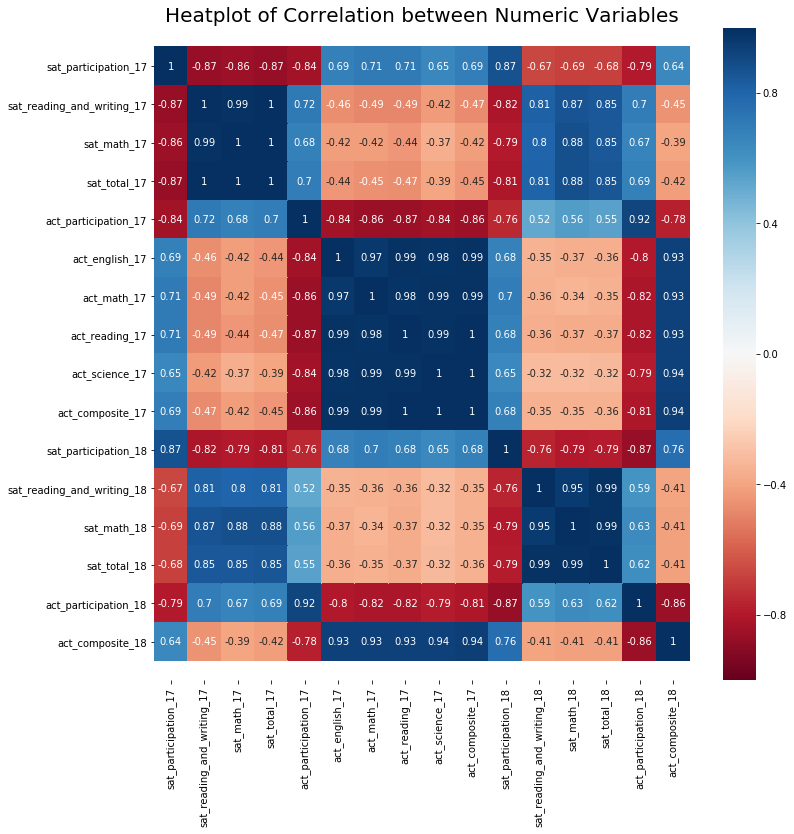

In [67]:
# Creating a heatmap to visualize the correlations between all numeric features
plt.figure(figsize=(12, 12))
sns.heatmap(combined.corr(), 
            cmap='RdBu', 
            annot=True,
            vmax=1,
            vmin=-1)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title("Heatplot of Correlation between Numeric Variables", fontsize = 20);

From the heatmap, we can see the following:
1. SAT participation rates are negatively correlated with ACT participation rates. 
2. SAT section scores are negatively correlated with SAT participation rates. So as the participation in the SAT exam increases, we expect for the average SAT section scores to decrease. Also, ACT section scores are negatively correlated with ACT participation rates.
3. 2017 and 2018 SAT participation rates are highly correlated with each other, and the same holds for the ACT participation rates, with 2017 and 2018 ACT participation rates also being highly correlated. 
4. Mean total/ composite scores are positively correlated with the respective exam section scores. 

In [79]:
# function that takes the names of 2+ columns and plots a histogram in each subplot in the figure
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    # making sure we have enough rows 
    nrows = int(np.ceil(len(list_of_columns)/2)) 
    # creating figure and subplots
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16,10))
    # turning matrix into a vector
    ax = ax.ravel()  
    # looping though the list of columns
    for i, column in enumerate(list_of_columns):
        # plotting a histogram in each subplot
        ax[i].hist(dataframe[column], bins = 10) 
        # setting the title for each subplot
        ax[i].set_title(list_of_titles[i], fontsize = 20)
        # labeling the axes for each subplot
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 14)     
    plt.tight_layout()

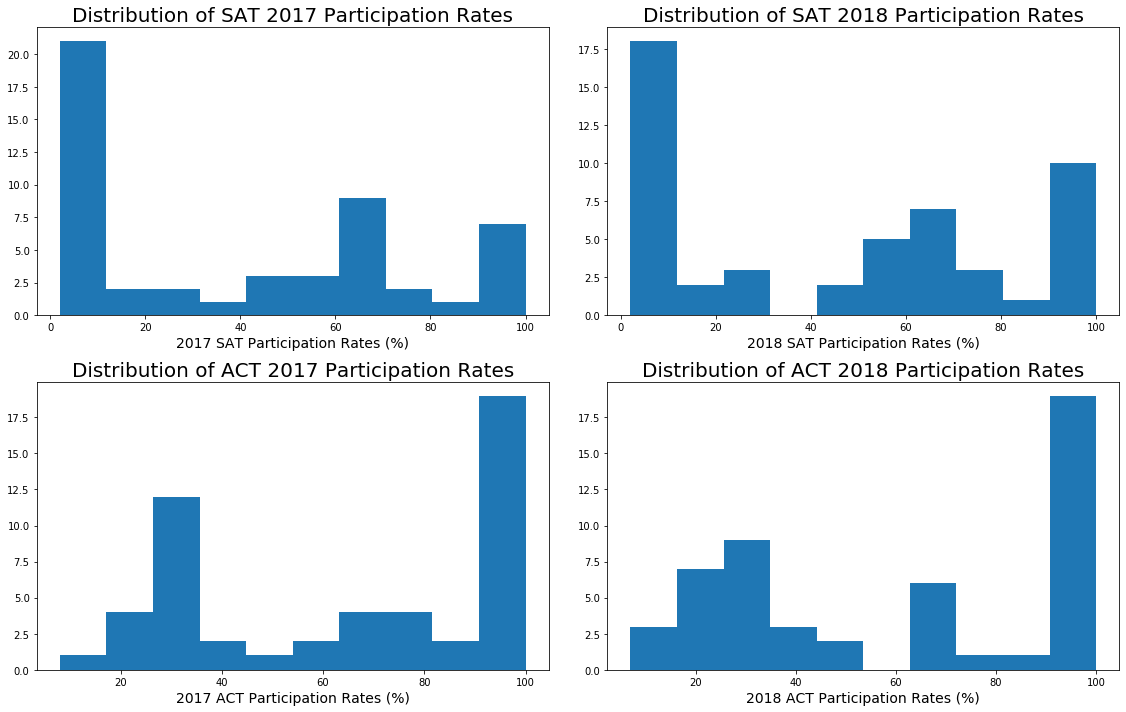

In [80]:
# plotting histogram for ACT and SAT participation rates
list_of_titles = ['Distribution of SAT 2017 Participation Rates', 'Distribution of SAT 2018 Participation Rates', 'Distribution of ACT 2017 Participation Rates', 'Distribution of ACT 2018 Participation Rates']
list_of_x_labels = ['2017 SAT Participation Rates (%)', '2018 SAT Participation Rates (%)','2017 ACT Participation Rates (%)', '2018 ACT Participation Rates (%)']
list_of_columns = ['sat_participation_17','sat_participation_18', 'act_participation_17' , 'act_participation_18']
subplot_histograms(combined, list_of_columns, list_of_titles, list_of_x_labels)

From the histograms, we can see a visual representation of both the inverse relationship between ACT and SAT participation rates and the positive relationship between the 2017 and 2018 participation rates of the same test. A large number of the states seem to have participation rates closer to the extreme points - 0% or 100%.

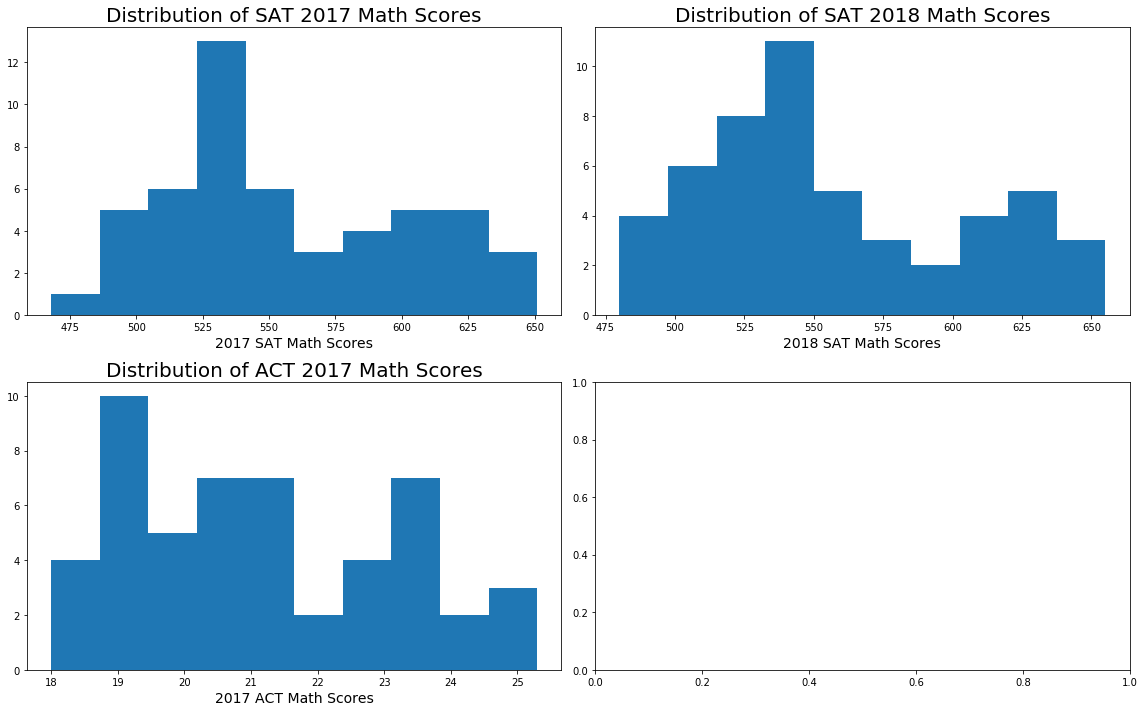

In [81]:
# plotting histogram for ACT and SAT Math scores
list_of_titles_math = ['Distribution of SAT 2017 Math Scores', 'Distribution of SAT 2018 Math Scores', 'Distribution of ACT 2017 Math Scores']
list_of_x_labels_math = ['2017 SAT Math Scores', '2018 SAT Math Scores','2017 ACT Math Scores']
list_of_columns_math = ['sat_math_17','sat_math_18', 'act_math_17']
subplot_histograms(combined, list_of_columns_math, list_of_titles_math, list_of_x_labels_math)

The distributions of the SAT Math scores are bimodel.

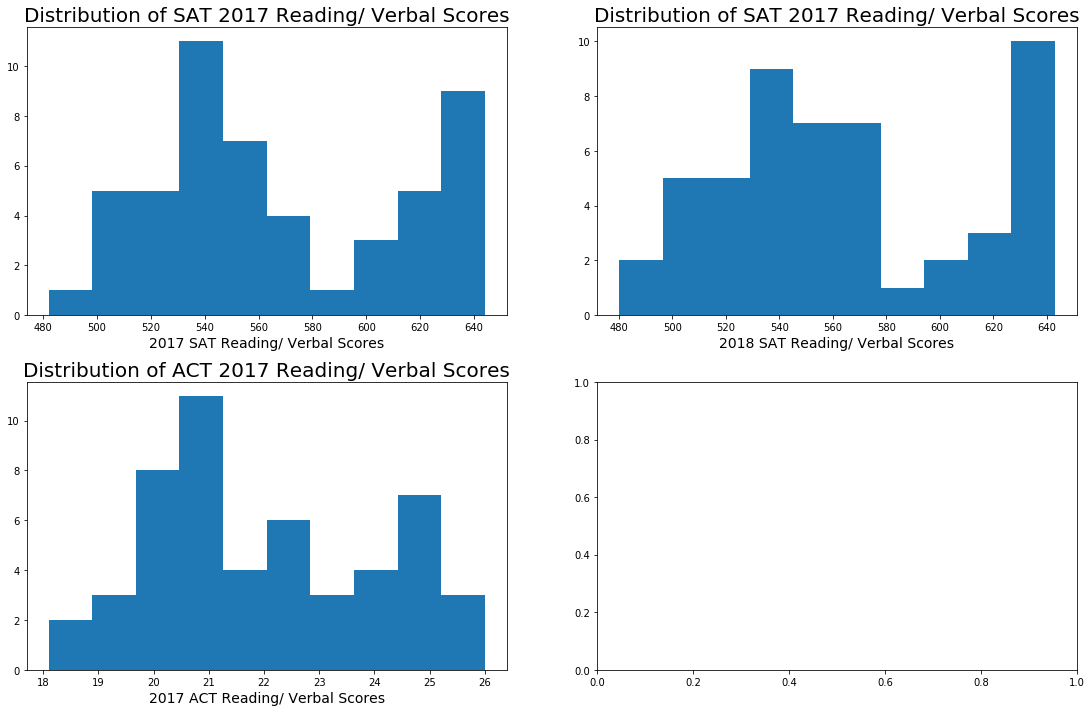

In [83]:
# plotting histogram for ACT and SAT Reading/Verbal scores
list_of_titles_read = ['Distribution of SAT 2017 Reading/ Verbal Scores', 'Distribution of SAT 2017 Reading/ Verbal Scores','Distribution of ACT 2017 Reading/ Verbal Scores']
list_of_x_labels_read = ['2017 SAT Reading/ Verbal Scores', '2018 SAT Reading/ Verbal Scores', '2017 ACT Reading/ Verbal Scores']
list_of_columns_read = ['sat_reading_and_writing_17','sat_reading_and_writing_18','act_reading_17']
subplot_histograms(combined, list_of_columns_read, list_of_titles_read, list_of_x_labels_read)

Similar to the distribution of the SAT Math Scores, the distributions of the SAT Reading/ Verbal Scores scores are bimodel.

In [126]:
# function to plot a scatter plot of two numeric variables against each other
def scatterplot(dataframe, column_1, column_2, title, xlabel, ylabel):
    # creating new figure
    plt.figure(figsize = (16,9))
    # plots scatterplot of column 1 vs column 2 in dataframe
    plt.scatter(dataframe[column_1], dataframe[column_2])
    # adding title
    plt.title(title, fontsize = 25)
    # adding axes labels
    plt.xlabel(xlabel, fontsize = 20)
    plt.ylabel(ylabel, fontsize = 20)
    plt.tight_layout()

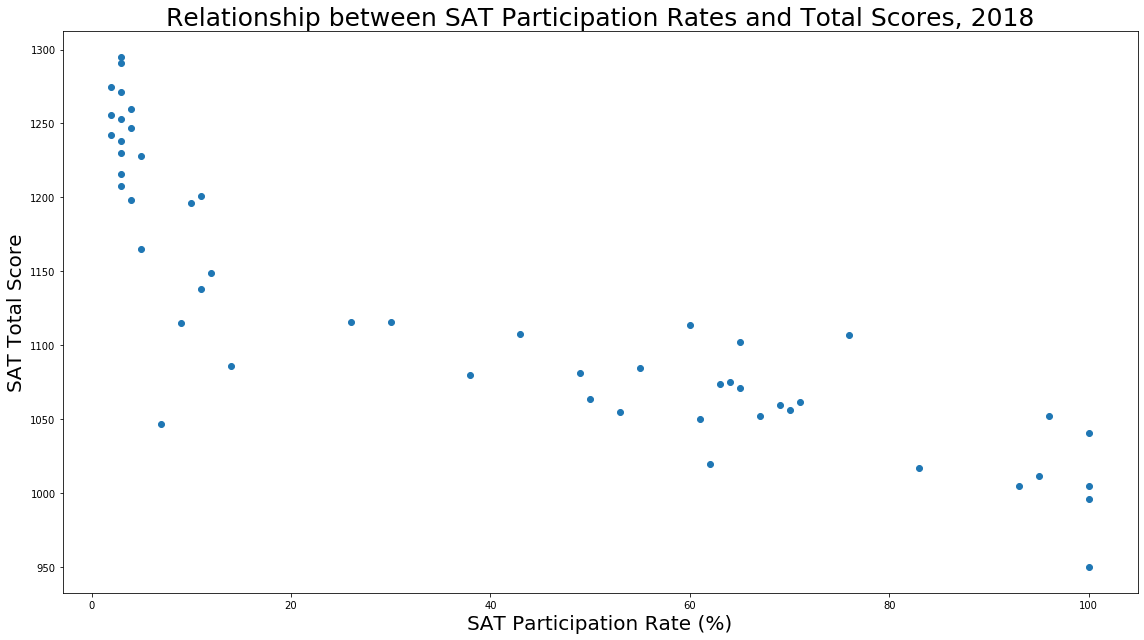

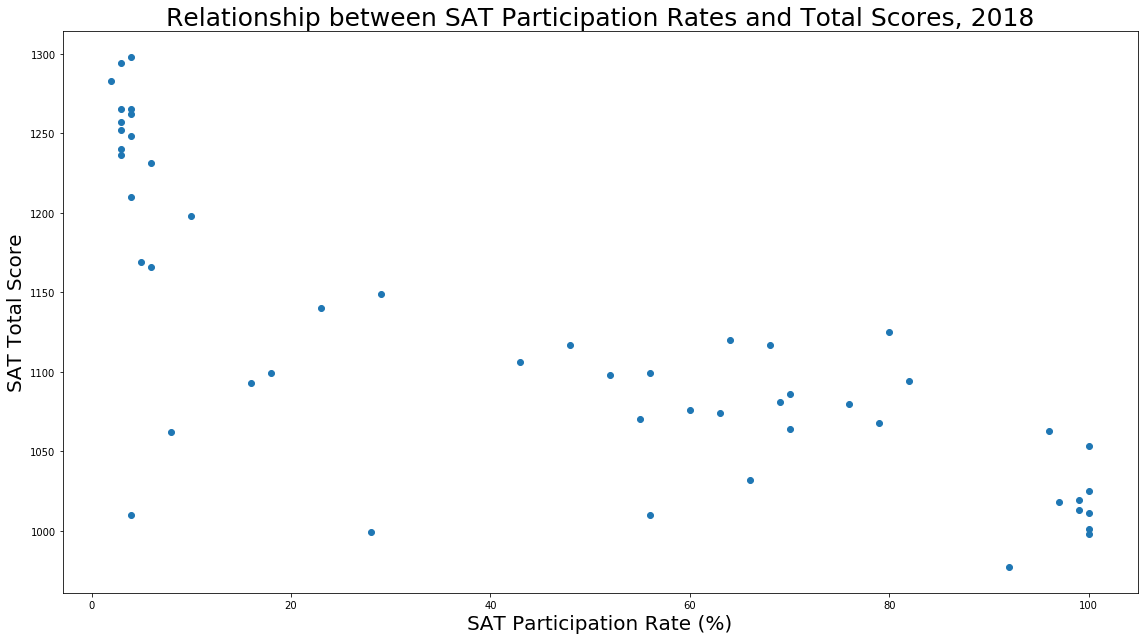

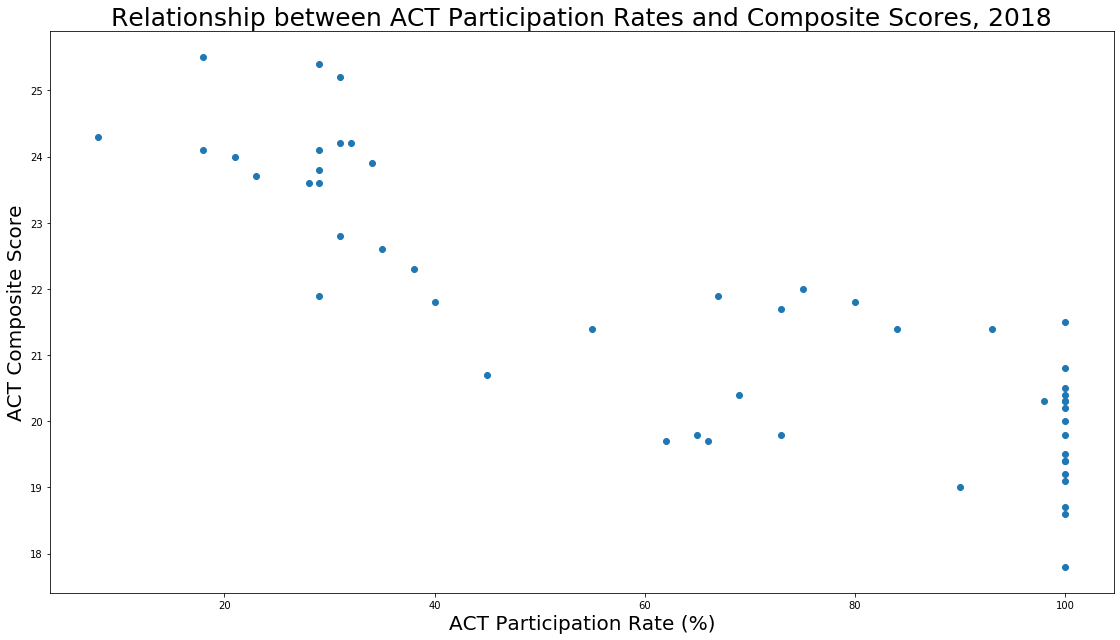

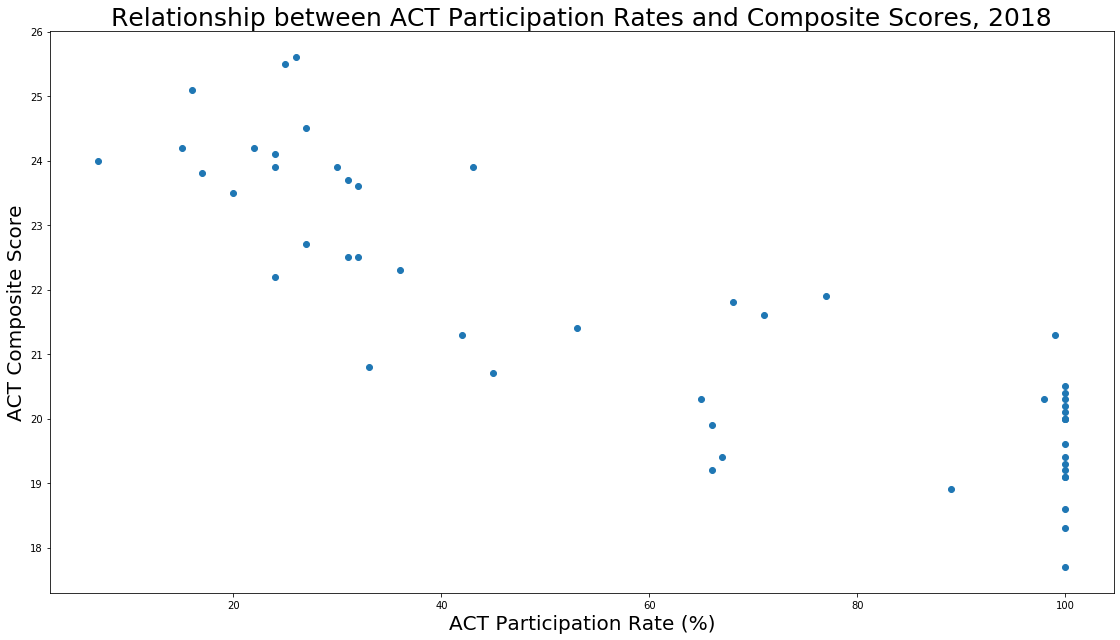

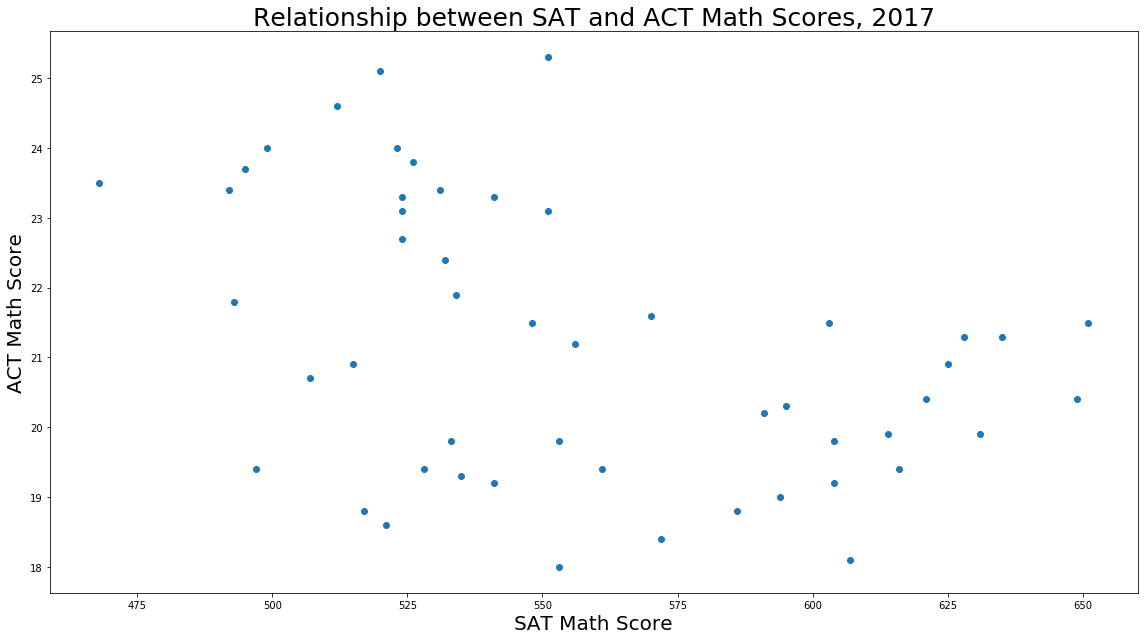

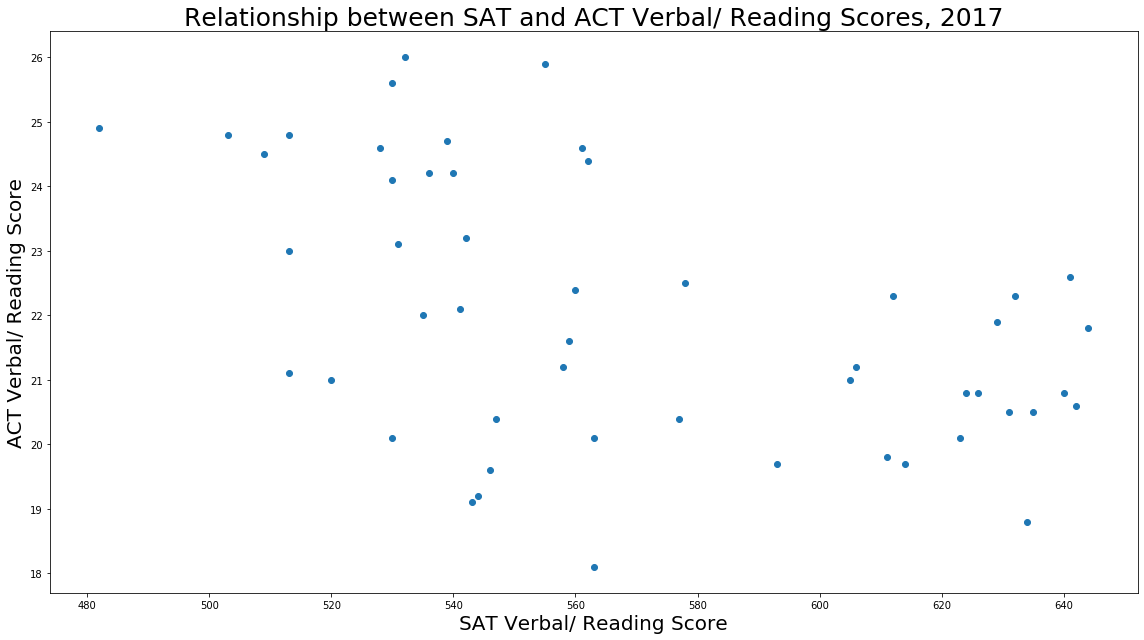

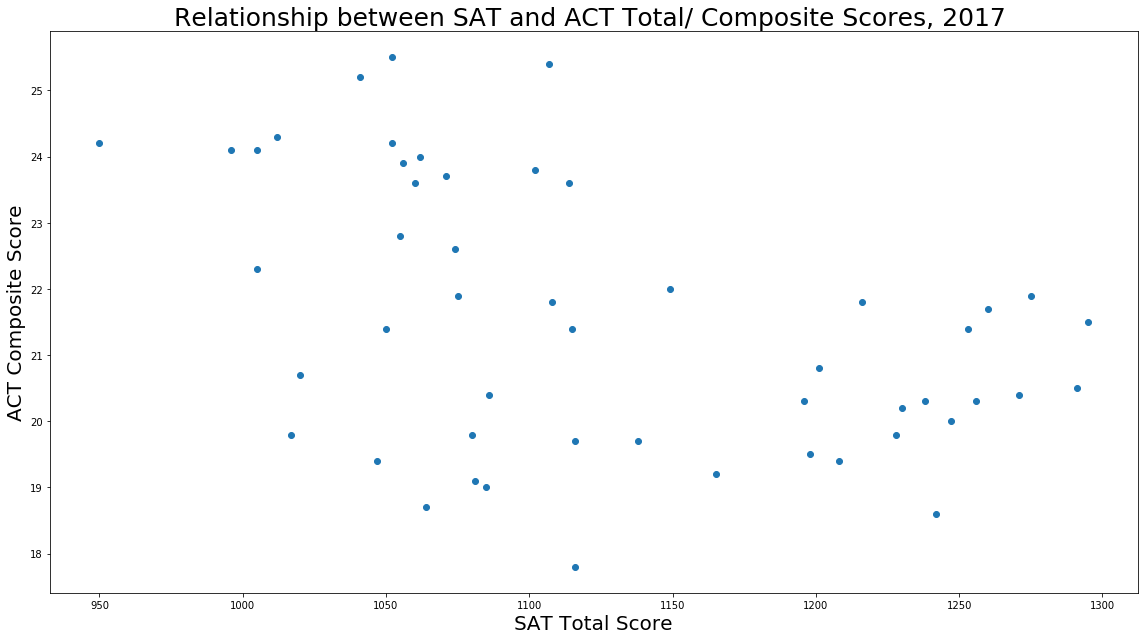

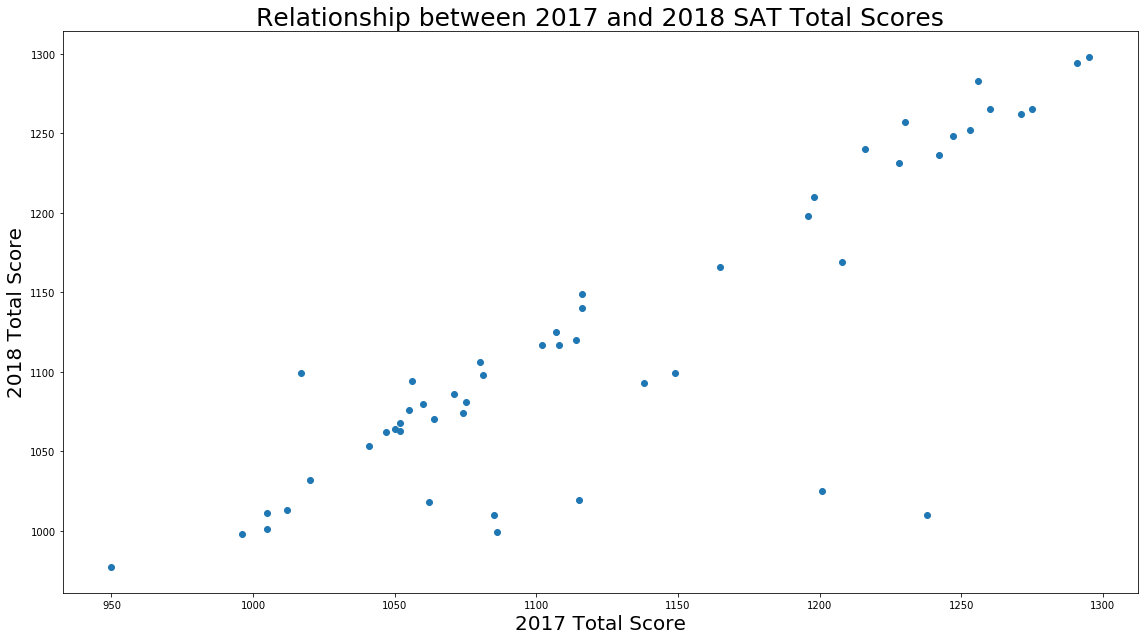

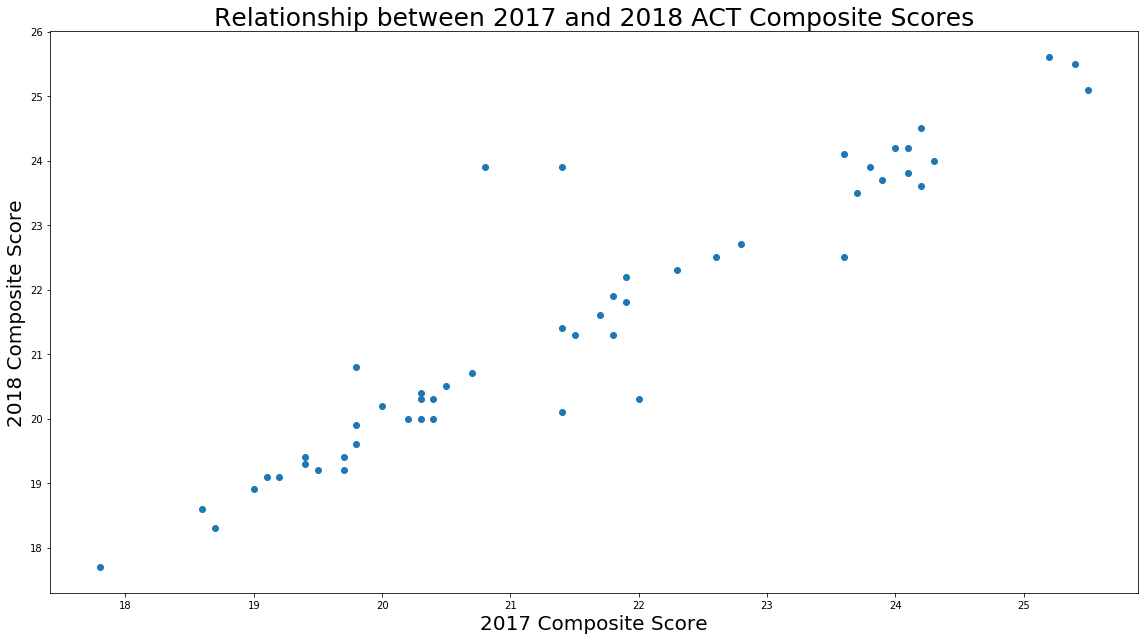

In [128]:
# plotting scatterplots
list_c1 = ['sat_participation_17','sat_participation_18', 'act_participation_17','act_participation_18', 
           'sat_math_17', 'sat_reading_and_writing_17', 'sat_total_17', 'sat_total_17', 'act_composite_17']

list_c2 = ['sat_total_17','sat_total_18', 'act_composite_17','act_composite_18', 'act_math_17',
          'act_reading_17', 'act_composite_17', 'sat_total_18', 'act_composite_18']

titles = ['Relationship between SAT Participation Rates and Total Scores, 2018', 
              'Relationship between SAT Participation Rates and Total Scores, 2018', 
              'Relationship between ACT Participation Rates and Composite Scores, 2018',
             'Relationship between ACT Participation Rates and Composite Scores, 2018',
         'Relationship between SAT and ACT Math Scores, 2017',
          'Relationship between SAT and ACT Verbal/ Reading Scores, 2017',
          'Relationship between SAT and ACT Total/ Composite Scores, 2017 ',
          'Relationship between 2017 and 2018 SAT Total Scores',
          'Relationship between 2017 and 2018 ACT Composite Scores'
         ]

xlabels = ['SAT Participation Rate (%)',
               'SAT Participation Rate (%)',
               'ACT Participation Rate (%)',
               'ACT Participation Rate (%)',
          'SAT Math Score',
           'SAT Verbal/ Reading Score',
           'SAT Total Score',
           '2017 Total Score',
           '2017 Composite Score']

ylabels = ['SAT Total Score',
               'SAT Total Score',
               'ACT Composite Score',
               'ACT Composite Score',
          'ACT Math Score',
           'ACT Verbal/ Reading Score',
           'ACT Composite Score',
           '2018 Total Score',
           '2018 Composite Score']


# looping through and plotting each scatterplot
for i in range(0, len(list_c1)):
    scatterplot(combined, list_c1[i], list_c2[i], titles[i], xlabels[i], ylabels[i])


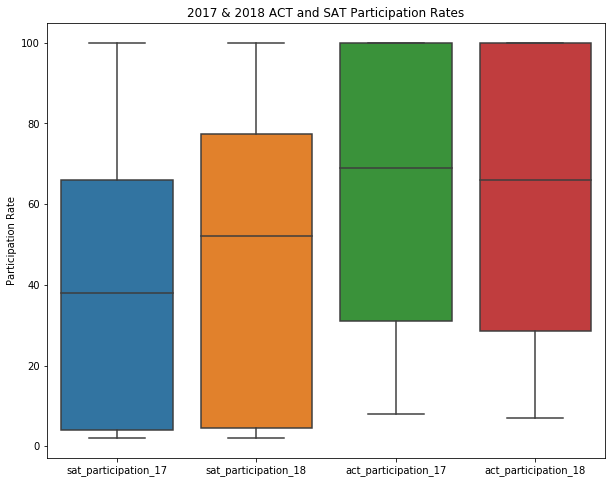

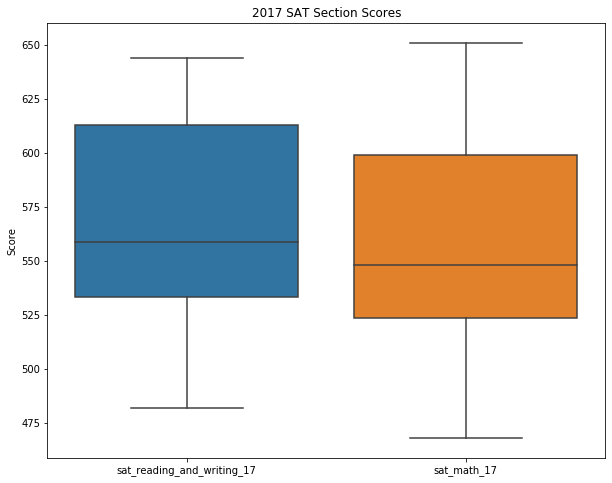

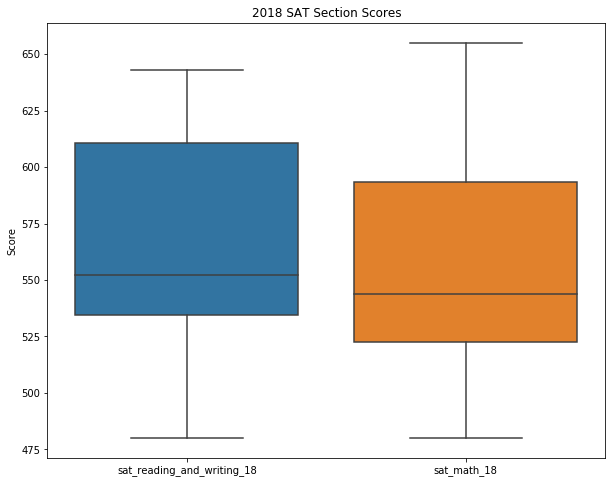

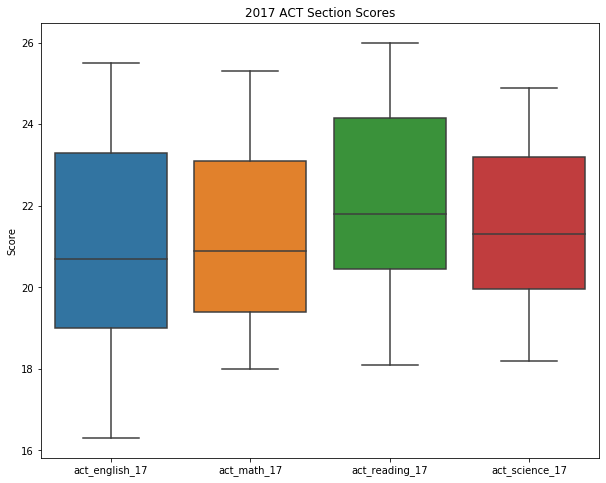

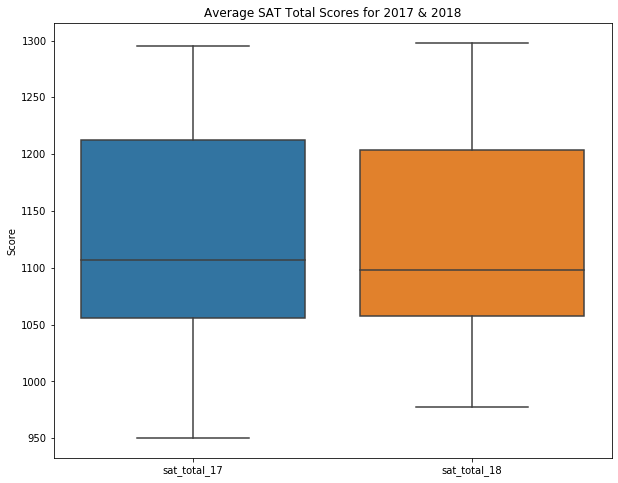

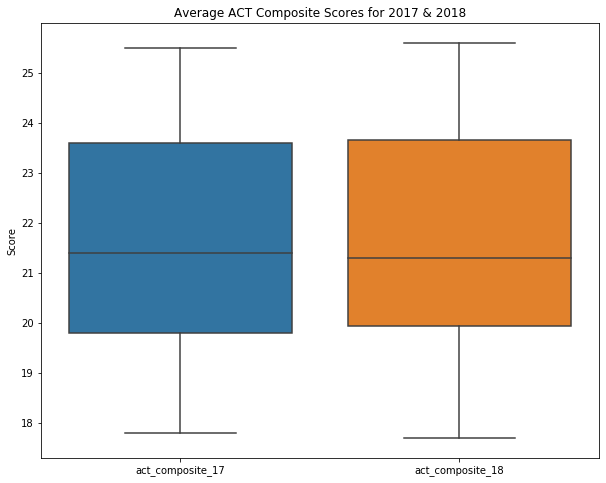

In [136]:
# Plotting boxplots of numeric variables 
boxps = [['sat_participation_17', 'sat_participation_18','act_participation_17','act_participation_18'],
        ['sat_reading_and_writing_17', 'sat_math_17'],
        ['sat_reading_and_writing_18', 'sat_math_18'],
        ['act_english_17', 'act_math_17', 'act_reading_17', 'act_science_17'],
        ['sat_total_17', 'sat_total_18'],
        ['act_composite_17','act_composite_18']]

titles = ['2017 & 2018 ACT and SAT Participation Rates',
         '2017 SAT Section Scores',
         '2018 SAT Section Scores',
          '2017 ACT Section Scores',
          'Average SAT Total Scores for 2017 & 2018',
          'Average ACT Composite Scores for 2017 & 2018',
         ]

ylabels = ['Participation Rate', 
          'Score',
          'Score',
          'Score',
          'Score',
          'Score']

for x,y,z in zip(boxps,titles,ylabels):
    plt.figure(figsize = (10,8))
    sns.boxplot(data = combined[x])
    plt.title(y)
    plt.ylabel(z);

## Analysis

Both the SAT and ACT exams have a negative relationship between their participation rates and their total scores.  When there are less students taking an the exam, and students have the choice whether or not to take it, there is a selection bias, as the students who take the exam will therefore do better than when the participation rate is greater, and more students who do not choose and may not be ready for the exam take it and get lower scores. Based on my exploration of the data, it seems that this is why 17 states with 100% participation in the ACT in 2018 fell below the mean, not the curriculum or state.

### Outside Research